<a href="https://colab.research.google.com/github/HimanshiRaghav/Anxiety-Disorder-Detection/blob/main/Another_copy_of_finalproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

Data Collection and analysis

In [2]:
# loading the dataset to a pandas Dataframe
anxiety_dataset = pd.read_excel('/content/Anxiety Data.xlsx')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [3]:
# printing the first five rows of the dataset
anxiety_dataset.head()

,Subject,Sex,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,SAD,GAD,Social Phobia,...,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis,GAD Probabiliy - Gamma,SAD Probability - Gamma,Sample Weight
0,Test101,F,0,2,1,1,0.0,0,1,1.0,...,27,396,4,3,2,0,0,1.596957,0.067867,0.572227
1,Test102,M,1,2,0,3,1.0,0,0,0.0,...,282,1179,6,1,0,1,1,0.032650,0.068811,0.396157
2,Test103,F,1,3,2,1,0.0,1,0,0.0,...,3,0,9,4,1,0,0,0.005782,0.270583,0.686673
3,Test104,F,0,4,2,0,0.0,0,0,0.0,...,30,45,6,0,0,0,1,1.596957,0.068811,0.400559
4,Test105,F,0,5,2,3,0.0,1,1,1.0,...,637,1170,10,5,2,0,0,1.596957,47.355899,0.314725


In [4]:
#number of rows and columns
anxiety_dataset.shape


(307, 27)

In [5]:
anxiety_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Subject                                 307 non-null    object 
 1   Sex                                     307 non-null    object 
 2   Race                                    307 non-null    int64  
 3   Age                                     307 non-null    int64  
 4   Number of Bio. Parents                  307 non-null    int64  
 5   Number of Siblings                      307 non-null    int64  
 6   Poverty Status                          288 non-null    float64
 7   SAD                                     307 non-null    int64  
 8   GAD                                     307 non-null    int64  
 9   Social Phobia                           306 non-null    float64
 10  ADHD                                    307 non-null    int64 

In [6]:
#checking for missing values
anxiety_dataset.isnull().sum()

Subject                                    0
Sex                                        0
Race                                       0
Age                                        0
Number of Bio. Parents                     0
Number of Siblings                         0
Poverty Status                            19
SAD                                        0
GAD                                        0
Social Phobia                              1
ADHD                                       0
CD                                         0
Depression                                 0
ODD                                        0
Number of Impairments                      0
Number of Type A Stressors                 0
Number of Type B Stressors                 0
Frequency Temper Tantrums                  0
Frequency Irritable Mood                   0
Number of Sleep Disturbances               0
Number of Physical Symptoms                0
Number of Sensory Sensitivities            0
Family His

In [7]:
# Check for missing values in the test set
missing_values_test = anxiety_dataset.isnull().sum()

# Display the counts of missing values for each column
print("\nMissing values in the test set:")
print(missing_values_test[missing_values_test > 0])


Missing values in the test set:
Poverty Status    19
Social Phobia      1
dtype: int64


In [8]:
anxiety_dataset.fillna(0, inplace=True)

test_df_filled = anxiety_dataset.fillna(anxiety_dataset.median())

<ipython-input-8-1ef905288e3d>:3: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df_filled = anxiety_dataset.fillna(anxiety_dataset.median())


In [9]:
anxiety_dataset.isnull().sum()

Subject                                   0
Sex                                       0
Race                                      0
Age                                       0
Number of Bio. Parents                    0
Number of Siblings                        0
Poverty Status                            0
SAD                                       0
GAD                                       0
Social Phobia                             0
ADHD                                      0
CD                                        0
Depression                                0
ODD                                       0
Number of Impairments                     0
Number of Type A Stressors                0
Number of Type B Stressors                0
Frequency Temper Tantrums                 0
Frequency Irritable Mood                  0
Number of Sleep Disturbances              0
Number of Physical Symptoms               0
Number of Sensory Sensitivities           0
Family History - Substance Abuse

In [10]:
#statistical measures about the data
anxiety_dataset.describe()

,Race,Age,Number of Bio. Parents,Number of Siblings,Poverty Status,SAD,GAD,Social Phobia,ADHD,CD,...,Frequency Temper Tantrums,Frequency Irritable Mood,Number of Sleep Disturbances,Number of Physical Symptoms,Number of Sensory Sensitivities,Family History - Substance Abuse,Family History - Psychiatric Diagnosis,GAD Probabiliy - Gamma,SAD Probability - Gamma,Sample Weight
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,0.547231,3.381107,1.416938,1.169381,0.325733,0.159609,0.149837,0.074919,0.071661,0.078176,...,79.547231,143.390879,3.934853,0.853420,0.218241,0.234528,0.332248,0.744005,1.560402,1.000037
std,0.498577,1.160925,0.633054,0.958608,0.469413,0.366841,0.357494,0.263690,0.258347,0.268886,...,143.875991,320.961765,2.090046,1.109089,0.567006,0.424395,0.471788,2.121029,6.879169,1.407209
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.005782,0.014828,0.286114
25%,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.005782,0.014828,0.381485
50%,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,24.000000,12.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.005782,0.058307,0.449607
75%,1.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,92.000000,120.000000,5.000000,1.000000,0.000000,0.000000,1.000000,0.032650,0.270583,1.030009
max,1.000000,6.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1110.000000,2430.000000,13.000000,6.000000,4.000000,1.000000,1.000000,9.017029,59.248223,11.444548


In [11]:
# Display available columns in the dataset
print("Available columns:")
print(anxiety_dataset.columns)

Available columns:
Index(['Subject', 'Sex', 'Race', 'Age', 'Number of Bio. Parents',
       'Number of Siblings', 'Poverty Status', 'SAD', 'GAD', 'Social Phobia',
       'ADHD', 'CD', 'Depression', 'ODD', 'Number of Impairments',
       'Number of Type A Stressors', 'Number of Type B Stressors',
       'Frequency Temper Tantrums', 'Frequency Irritable Mood',
       'Number of Sleep Disturbances', 'Number of Physical Symptoms',
       'Number of Sensory Sensitivities', 'Family History - Substance Abuse',
       'Family History - Psychiatric Diagnosis', 'GAD Probabiliy - Gamma',
       'SAD Probability - Gamma', 'Sample Weight'],
      dtype='object')


In [12]:
# set target variable
anxiety_dataset['GAD'].value_counts()

0    261
1     46
Name: GAD, dtype: int64

here the distribution is imbalanced therefore we need to do processing
Oversampling: Increase the number of instances of the minority class by duplicating or creating synthetic samples.  
SMOTE (Synthetic Minority Over-sampling Technique)


In [13]:

# X should contain the feature columns, and y should contain the target variable
X = anxiety_dataset.drop('GAD', axis=1)
y = anxiety_dataset['GAD']

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Encode categorical columns (example using one-hot encoding)
X_encoded = pd.get_dummies(X, columns=categorical_columns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2, stratify=y)
#random_state=2 in this code will ensure that the random processes (like data splitting and synthetic sample generation)


# Apply SMOTE to the training set
smote = SMOTE(random_state=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
#SMOTE is typically applied only to the training data, and not the testing or validation data
# Now X_resampled and y_resampled contain the resampled dataset with balanced class distribution

X_resampled and y_resampled for training your models on the resampled dataset.

This code helps in handling class imbalance using SMOTE and ensure that your categorical columns are appropriately encoded for machine learning models. Remember to use X_resampled and y_resampled for training your models on the resampled dataset.

"categorical columns" refers to those columns in your dataset that contain categorical (or non-numeric) variables.
 Categorical variables are those that can take on a limited, fixed number of values, representing different categories or groups.

In [14]:
print(X.shape, X_resampled.shape,X_test.shape)

(307, 26) (416, 333) (62, 333)


Model training
(RandomForestRegressor model)

Imagine you're trying to predict how much someone might be feeling anxious. The RandomForestRegressor is like having a bunch of smart friends, each with their own way of figuring things out. Each friend looks at a slightly different part of the situation (random subset of the data) and shares their guess. By putting all their guesses together, you get a more accurate answer. This way, even if one friend isn't perfect, the group as a whole does a better job. It's like having a team of buddies helping you understand and predict anxiety levels by considering different aspects all at once.

---



In [15]:
# Train a RandomForestRegressor model
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_resampled, y_resampled)

RandomForestRegressor(random_state=42)

Random Forest provides a measure of feature importance based on how much each feature contributes to the reduction in impurity or error during the construction of the trees. This can be useful for understanding the key features driving predictions.

In [16]:
# Display feature importances
feature_importance = random_forest.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X_train.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
Race: 0.0
Age: 8.248621924942826e-05
Number of Bio. Parents: 0.00015836048500261218
Number of Siblings: 0.0001412840086916582
Poverty Status: 0.0
SAD: 0.0
Social Phobia: 0.0
ADHD: 0.0
CD: 0.0
Depression: 0.0
ODD: 0.0
Number of Impairments: 0.0
Number of Type A Stressors: 0.0
Number of Type B Stressors: 0.00022924339604448327
Frequency Temper Tantrums: 0.00021334989475719736
Frequency Irritable Mood: 0.0004399320161445013
Number of Sleep Disturbances: 0.007188890056984848
Number of Physical Symptoms: 0.0
Number of Sensory Sensitivities: 0.0
Family History - Substance Abuse: 0.0
Family History - Psychiatric Diagnosis: 0.0
GAD Probabiliy - Gamma: 0.9496436141191116
SAD Probability - Gamma: 0.00031776173354159493
Sample Weight: 0.00757179384123895
Subject_Test101: 0.0
Subject_Test102: 0.0
Subject_Test103: 0.0
Subject_Test104: 0.008055585236937779
Subject_Test105: 0.0
Subject_Test106: 0.0
Subject_Test107: 0.0
Subject_Test108: 0.0
Subject_Test109: 0.0
Subject_Test110: 0.0

In [17]:
# Make predictions on the test set
y_pred = random_forest.predict(X_test)

Evaluate the Model:
Calculate the Mean Squared Error (MSE) to evaluate the performance of the regression model.

In [18]:

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 0.02


In [19]:
# # Make Predictions
# y_pred = random_forest.predict(X_test)

# # Print all predicted anxiety levels
# print("All Predicted Anxiety Levels:")
# print(y_pred)

In [20]:

# Define a threshold for correctness
threshold = 0.5 # Adjust as needed

# Convert regression problem into a binary classification problem based on the threshold
binary_y_pred = (y_pred > threshold).astype(int)
binary_y_test = (y_test > threshold).astype(int)

# Calculate accuracy as a binary classification metric
accuracy = (binary_y_pred == binary_y_test).mean()
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 98.39%


In [21]:
# Make Predictions
y_pred = random_forest.predict(X_test)

# Assuming 'predictions' is a DataFrame containing the predictions
predictions = pd.DataFrame({'Predicted Anxiety': y_pred})

# Set Thresholds for Anxiety Levels
threshold_low = 2.0
threshold_high = 5.0

# Categorize Anxiety Levels
predictions['Anxiety Level'] = pd.cut(predictions['Predicted Anxiety'], bins=[-float('inf'), threshold_low, threshold_high, float('inf')],
                                      labels=['Low Anxiety', 'Medium Anxiety', 'High Anxiety'])

# Display the categorized anxiety levels
print(predictions[['Predicted Anxiety', 'Anxiety Level']])


    Predicted Anxiety Anxiety Level
0                0.00   Low Anxiety
1                0.00   Low Anxiety
2                0.00   Low Anxiety
3                0.00   Low Anxiety
4                0.00   Low Anxiety
..                ...           ...
57               0.00   Low Anxiety
58               0.00   Low Anxiety
59               0.89   Low Anxiety
60               0.00   Low Anxiety
61               0.00   Low Anxiety

[62 rows x 2 columns]


analysis:
Visualize Predictions vs. Actual Values:

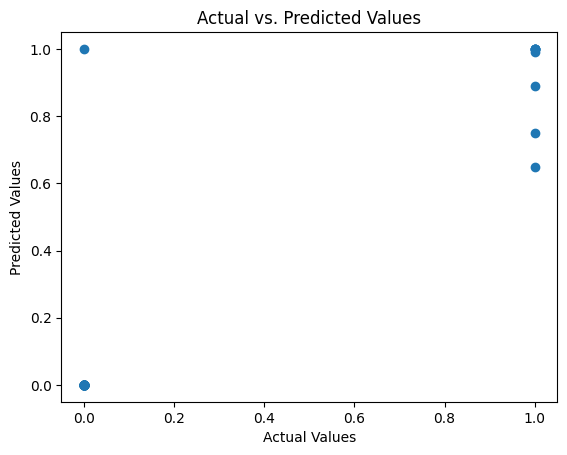

In [22]:
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your true and predicted values, respectively
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()


Residual Analysis:
Analyze the residuals (the differences between actual and predicted values). A histogram of residuals can provide insights into the distribution and pattern of errors.

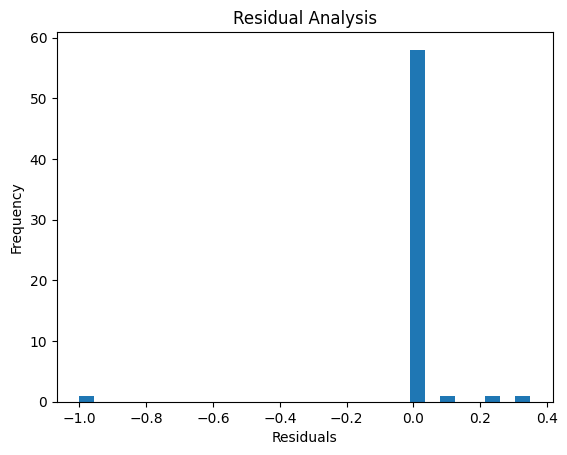

In [23]:
residuals = y_test - y_pred
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Analysis")
plt.show()


Evaluate Performance Metrics:
Calculate and display additional regression metrics to quantitatively assess the model's performance, such as R-squared, Mean Absolute Error (MAE), and others.

In [24]:


r_squared = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"R-squared: {r_squared:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")


R-squared: 0.84
Mean Absolute Error: 0.03


Feature Importance Analysis:
If you have feature importances from your model, analyze which features contribute the most to predictions.

In [25]:
feature_importance = random_forest.feature_importances_
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(feature_importance_df)


Feature Importance:
                          Feature  Importance
21         GAD Probabiliy - Gamma    0.949644
144               Subject_Test221    0.008351
27                Subject_Test104    0.008056
23                  Sample Weight    0.007572
16   Number of Sleep Disturbances    0.007189
..                            ...         ...
115               Subject_Test192    0.000000
114               Subject_Test191    0.000000
113               Subject_Test190    0.000000
112               Subject_Test189    0.000000
332                         Sex_M    0.000000

[333 rows x 2 columns]


In [26]:
# Selected parameters for user input
selected_columns_for_input = [
    'Age', 'Number of Bio. Parents', 'Number of Siblings', 'Poverty Status', 'Social Phobia',
    'ADHD', 'Depression', 'Number of Sleep Disturbances', 'Number of Sensory Sensitivities',
    'Family History - Substance Abuse'
]

In [27]:
# Identify numerical columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [28]:
# Filter numerical columns among the selected columns
selected_numerical_columns = [col for col in selected_columns_for_input if col in numerical_columns]

# Filter categorical columns among the selected columns
selected_categorical_columns = [col for col in selected_columns_for_input if col not in numerical_columns]

# Ensure that all necessary columns are present in X
missing_columns = set(selected_columns_for_input) - set(X.columns)
X = X.assign(**{col: 0 for col in missing_columns})

In [29]:
#
# Apply SMOTE to the training set (if needed)
smote = SMOTE(random_state=2)

# Apply SMOTE to the training set (if needed)
smote = SMOTE(random_state=2)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2, stratify=y)


# Use RandomForestRegressor instead of RandomForestClassifier
rf_reg_model = RandomForestRegressor(random_state=2)
rf_reg_model.fit(X_resampled, y_resampled)

RandomForestRegressor(random_state=2)

In [30]:
# Scale numerical columns
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X[selected_numerical_columns]), columns=selected_numerical_columns)

# Combine scaled numerical columns with categorical columns
X_processed = pd.concat([X_scaled, X[selected_categorical_columns]], axis=1)

In [31]:
# Display information about input types
print("\nPlease provide the following types of inputs:")
for column in selected_columns_for_input:
    if column == 'Age' or column == 'Number of Bio. Parents' or column == 'Number of Siblings':
        print(f" - {column}: Numerical value")
    else:
        print(f" - {column}: 0 for No, 1 for Yes")


Please provide the following types of inputs:
 - Age: Numerical value
 - Number of Bio. Parents: Numerical value
 - Number of Siblings: Numerical value
 - Poverty Status: 0 for No, 1 for Yes
 - Social Phobia: 0 for No, 1 for Yes
 - ADHD: 0 for No, 1 for Yes
 - Depression: 0 for No, 1 for Yes
 - Number of Sleep Disturbances: 0 for No, 1 for Yes
 - Number of Sensory Sensitivities: 0 for No, 1 for Yes
 - Family History - Substance Abuse: 0 for No, 1 for Yes


In [ ]:
# User Input Section
print("\nEnter your information to predict Anxiety Level:")

user_inputs = {}

# Collect user inputs
for column in selected_columns_for_input:
    if column == 'Age' or column == 'Number of Bio. Parents' or column == 'Number of Siblings':
        while True:
            try:
                user_input = float(input(f"Enter numerical value for {column}: "))
                break
            except ValueError:
                print("Please enter a valid numerical value.")

        user_inputs[column] = [user_input]
    else:
        while True:
            user_input = input(f"Enter value for {column} (0 for No, 1 for Yes): ")
            if user_input in ['0', '1']:
                user_inputs[column] = [int(user_input)]
                break
            else:
                print("Please enter either 0 or 1.")

# Check for missing features and reorder columns
feature_names_expected = rf_reg_model.feature_names_in_
missing_features = set(feature_names_expected) - set(user_df_processed.columns)


# Reorder columns to match the expected order
user_df_processed = user_df_processed[feature_names_expected]

# Make prediction for user inputs
user_prediction = rf_reg_model.predict(user_df_processed)

# Convert the prediction to a percentage
user_prediction_percentage = user_prediction[0] * 100

# Compare user prediction with target variable
print(f'\nPredicted Anxiety Level: {user_prediction_percentage:.0f}%')

# Define thresholds for classification
low_threshold = 30
high_threshold = 70

# Classify based on thresholds
if user_prediction_percentage < low_threshold:
    print('Prediction: Low Anxiety Level')
elif low_threshold <= user_prediction_percentage < high_threshold:
    print('Prediction: Moderate Anxiety Level')
else:
    print('Prediction: High Anxiety Level')



Enter your information to predict Anxiety Level:


In [33]:
# Store the user input in the dictionary
user_inputs[column] = [user_input]

In [34]:
# Create a DataFrame from user inputs
user_df = pd.DataFrame(user_inputs)

# Ensure all necessary columns are present in user_df
missing_user_columns = set(selected_columns_for_input) - set(user_df.columns)
user_df = user_df.assign(**{col: 0 for col in missing_user_columns})

# Reorder user_df columns to match the order during training
user_df = user_df[selected_columns_for_input]

# Scale numerical columns for user input
user_numerical_scaled = pd.DataFrame(scaler.transform(user_df[selected_numerical_columns]), columns=selected_numerical_columns)

# Combine scaled numerical columns with categorical columns for user input
user_df_processed = pd.concat([user_numerical_scaled, user_df[selected_categorical_columns]], axis=1)

# Ensure that user_df_processed has the same columns as the model was trained on
missing_model_columns = set(rf_reg_model.feature_names_in_) - set(user_df_processed.columns)
user_df_processed = user_df_processed.assign(**{col: 0 for col in missing_model_columns})

# Set the order of columns in user_df_processed to match the model's feature order
user_df_processed = user_df_processed[rf_reg_model.feature_names_in_]

# Make prediction
user_prediction = rf_reg_model.predict(user_df_processed)

print(f"Predicted Anxiety Level: {user_prediction[0]}")

Predicted Anxiety Level: 0.0


<ipython-input-34-57c14ecf84ee>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_df_processed = user_df_processed.assign(**{col: 0 for col in missing_model_columns})
<ipython-input-34-57c14ecf84ee>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_df_processed = user_df_processed.assign(**{col: 0 for col in missing_model_columns})
<ipython-input-34-57c14ecf84ee>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

In [35]:
# Set the order of columns in user_df_processed to match the model's feature order
user_df_processed = user_df_processed[rf_reg_model.feature_names_in_]

# Make prediction
user_prediction = rf_reg_model.predict(user_df_processed)

print(f"Predicted Anxiety Level: {user_prediction[0]}")

Predicted Anxiety Level: 0.0


In [36]:
1
# User Input Section
print("\nEnter your information to predict Anxiety Level:")

user_inputs = {}

for column in selected_columns_for_input:
    if column == 'Age' or column == 'Number of Bio. Parents' or column == 'Number of Siblings':
        user_input = float(input(f"Enter numerical value for {column}: "))
        user_inputs[column] = [user_input]
    else:
        while True:
            user_input = input(f"Enter value for {column} (0 for No, 1 for Yes): ")
            if user_input in ['0', '1']:
                user_inputs[column] = [int(user_input)]
                break
            else:
                print("Please enter either 0 or 1.")


Enter your information to predict Anxiety Level:
Enter numerical value for Age: 1
Enter numerical value for Number of Bio. Parents: 1
Enter numerical value for Number of Siblings: 1
Enter value for Poverty Status (0 for No, 1 for Yes): 1
Enter value for Social Phobia (0 for No, 1 for Yes): 1
Enter value for ADHD (0 for No, 1 for Yes): 1
Enter value for Depression (0 for No, 1 for Yes): 1
Enter value for Number of Sleep Disturbances (0 for No, 1 for Yes): 1
Enter value for Number of Sensory Sensitivities (0 for No, 1 for Yes): 1
Enter value for Family History - Substance Abuse (0 for No, 1 for Yes): 1


In [37]:
# Convert user inputs to a DataFrame
user_df = pd.DataFrame(user_inputs)

# Ensure that all necessary columns are present in user_df
missing_user_columns = set(selected_columns_for_input) - set(user_df.columns)
user_df = user_df.assign(**{col: 0 for col in missing_user_columns})

# Reorder user_df columns to match the order during training
user_df = user_df[selected_columns_for_input]

# Scale numerical columns for user input
user_numerical_scaled = pd.DataFrame(scaler.transform(user_df[selected_numerical_columns]), columns=selected_numerical_columns)

# Combine scaled numerical columns with categorical columns for user input
user_df_processed = pd.concat([user_numerical_scaled, user_df[selected_categorical_columns]], axis=1)

# Ensure that user_df_processed has the same columns as the model was trained on
missing_model_columns = set(rf_reg_model.feature_names_in_) - set(user_df_processed.columns)
user_df_processed = user_df_processed.assign(**{col: 0 for col in missing_model_columns})

# Set the order of columns in user_df_processed to match the model's feature order
user_df_processed = user_df_processed[rf_reg_model.feature_names_in_]

user_prediction = rf_reg_model.predict(user_df_processed)

<ipython-input-37-16023cc9e327>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_df_processed = user_df_processed.assign(**{col: 0 for col in missing_model_columns})
<ipython-input-37-16023cc9e327>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  user_df_processed = user_df_processed.assign(**{col: 0 for col in missing_model_columns})
<ipython-input-37-16023cc9e327>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Conside

In [38]:
# Convert user inputs to a DataFrame
user_df = pd.DataFrame(user_inputs)

# Ensure that all necessary columns are present in user_df
missing_user_columns = set(selected_columns_for_input) - set(user_df.columns)
user_df = user_df.assign(**{col: 0 for col in missing_user_columns})

# Scale numerical columns for user input
user_numerical_scaled = pd.DataFrame(scaler.transform(user_df[selected_numerical_columns]), columns=selected_numerical_columns)

# Combine scaled numerical columns with categorical columns for user input
user_df_processed = pd.concat([user_numerical_scaled, user_df[selected_categorical_columns]], axis=1)

In [41]:
user_prediction = rf_reg_model.predict(user_df_processed)

ValueError: ignored

In [42]:
# Make prediction for user inputs
user_prediction = rf_reg_model.predict(user_df_processed)

# Convert the prediction to a percentage
user_prediction_percentage = user_prediction[0] * 100

ValueError: ignored

In [43]:


# Compare user prediction with target variable
print(f'\nPredicted Anxiety Level: {user_prediction_percentage:.0f}%')

# Define thresholds for classification
low_threshold = 30
high_threshold = 70

# Classify based on thresholds
if user_prediction_percentage < low_threshold:
    print('Prediction: Low Anxiety Level')
elif low_threshold <= user_prediction_percentage < high_threshold:
    print('Prediction: Moderate Anxiety Level')
else:
    print('Prediction: High Anxiety Level')


NameError: ignored